In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

# 損失関数とトレーニング誤差・テスト誤差

In [2]:
par = np.linspace(-3,3,50)   # パラメータの範囲
te_err = (1+par**2)/2          # テスト誤差

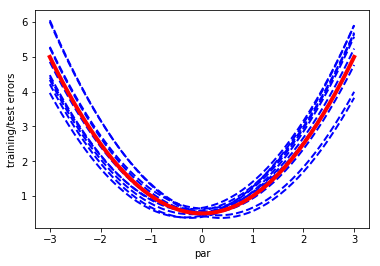

In [3]:
# テスト誤差をプロット
for i in range(10):
    z = np.random.normal(size=20)                 # データ生成
    trerr = np.mean(np.subtract.outer(z,par)**2/2, axis=0)   # トレーニング誤差
    plt.plot(par,trerr,'b--',linewidth=2)                # トレーニング誤差をプロット

plt.xlabel("par")
plt.ylabel("training/test errors")
plt.plot(par, te_err,'r-',linewidth=4)
plt.show()

# テスト誤差の推定：交差検証法

In [4]:
from sklearn.tree import DecisionTreeRegressor
n = 100; K = 10                  # 設定：データ数．10重CV
# データ生成 
x = np.random.uniform(-2,2,n)    # 区間[-2,2]上の一様分布
y = np.sin(2*np.pi*x)/x + np.random.normal(scale=0.5,size=n)
# データをグループ分け 
cv_idx = np.tile(np.arange(K), int(np.ceil(n/K)))[:n]    
maxdepths = np.arange(2,10)      # 決定木の深さの候補
cverr = np.array([])
for mp in maxdepths:
    cverr_lambda = np.array([])
    for k in range(K):  
        tr_idx = (cv_idx!=k) 
        te_idx = (cv_idx==k) 
        cvx = x[tr_idx]; cvy = y[tr_idx]   # CVのためデータを分割
        dtreg = DecisionTreeRegressor(max_depth=mp)
        dtreg.fit(np.array([cvx]).T, cvy)               # 決定木で推定
        ypred = dtreg.predict(np.array([x[te_idx]]).T)  # 予測
        # CV誤差の計算
        cl = np.append(cverr_lambda, np.mean((y[te_idx]-ypred)**2/2))
    cverr = np.append(cverr, np.mean(cl))

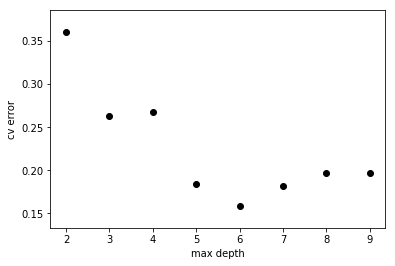

In [5]:
plt.scatter(maxdepths, cverr,c='k')  # cv誤差のプロット
plt.xlabel("max depth"); plt.ylabel('cv error')
plt.show()

# ROC曲線とAUC

In [6]:
n = 100     # データ数 100
xp = np.random.normal(loc=1,size=n*2).reshape(n,2) # 信号アリ
xn = np.random.normal(size=n*2).reshape(n,2)       # 信号ナシ

In [7]:
# F1 のAUC
np.mean(np.subtract.outer(xp[:,0],xn[:,0]) >= 0)   

0.72609999999999997

In [8]:
# F2 のAUC
np.mean(np.subtract.outer(np.sum(xp,1),np.sum(xn,1)) >= 0)  

0.81410000000000005

In [9]:
n = 10000  # データ数 10000
xp = np.random.normal(loc=1,size=n*2).reshape(n,2) # 信号アリ
xn = np.random.normal(size=n*2).reshape(n,2)       # 信号ナシ

In [10]:
# F1 のAUC
np.mean(np.subtract.outer(xp[:,0],xn[:,0]) >= 0)   

0.75750925000000002

In [11]:
# F2 のAUC
np.mean(np.subtract.outer(np.sum(xp,1),np.sum(xn,1)) >= 0)

0.83975127000000005

In [12]:
import scipy as sp
from scipy import integrate    # integrateを使う

In [13]:
# F1のAUC
def fpr(c):
    return(1-sp.stats.norm.cdf(c))
def tpr(c):
    return(1-sp.stats.norm.cdf(c,loc=1))
c = np.arange(-10, 10, 0.01)
sp.integrate.cumtrapz(tpr(c)[::-1],fpr(c)[::-1])[-1]  # F1のAUCの計算

0.76024810812092736

In [14]:
# F2のAUC
def fpr(c):
    return(1-sp.stats.norm.cdf(c,scale=np.sqrt(2))) 
def tpr(c):
    return(1-sp.stats.norm.cdf(c,loc=2,scale=np.sqrt(2)))
sp.integrate.cumtrapz(tpr(c)[::-1],fpr(c)[::-1])[-1]  # F2のAUCの計算

0.84134373785894323